In [17]:
import numpy as np
import rasterio
import findiff
from findiff import FinDiff, coefficients, Coefficient

In [24]:
with rasterio.open(r'E:\Brazil\Meridian Mining Espigao BM-AU\imageToDriveSentinel2MeridianDrill (1).tif') as SENTINEL:
    data = SENTINEL.read()
    SENTINEL.crs

In [31]:
datadiff = np.diff(data)
with rasterio.open(r'E:\Brazil\Meridian Mining Espigao BM-AU\imageToDriveSentinel2MeridianDrillDiff1.tif', 'w', **SENTINEL.meta) as dstcls:
    dstcls.write(datadiff) #rearrange back to format rasterio expects - 


In [28]:
datadiff.shape
data.shape
print(data[0])
print(datadiff[0])

[[0.1079  0.1079  0.1079  ... 0.10435 0.10435 0.10435]
 [0.1079  0.1079  0.1079  ... 0.10435 0.10435 0.10435]
 [0.108   0.108   0.108   ... 0.10435 0.10435 0.10435]
 ...
 [0.1203  0.1203  0.1203  ... 0.1249  0.1249  0.1249 ]
 [0.1203  0.1203  0.1203  ... 0.1249  0.1249  0.1249 ]
 [0.12    0.12    0.12    ... 0.1249  0.1249  0.1249 ]]
[[0.     0.     0.0012 ... 0.     0.     0.    ]
 [0.     0.     0.0012 ... 0.     0.     0.    ]
 [0.     0.     0.0002 ... 0.     0.     0.    ]
 ...
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]]


In [39]:
print(data[12][0][0], data[12][1].shape)
print(data[12][0][1], data[12][2].shape)
print(data[12][0][2], data[12][2].shape)
print(datadiff[12][0][0])
print(datadiff[12][0][1])
print(datadiff[12][0][2])

0.0385 (4363,)
0.0366 (4363,)
0.0366 (4363,)
-0.0018999986
0.0
-0.000500001


In [41]:
from scipy import ndimage
import matplotlib.pyplot as plt

sx = ndimage.sobel(data, axis=0, mode='constant')
sy = ndimage.sobel(data, axis=1, mode='constant')
sob = np.hypot(sx, sy)
sob.shape

with rasterio.open(r'E:\Brazil\Meridian Mining Espigao BM-AU\imageToDriveSentinel2MeridianDrillSob.tif', 'w', **SENTINEL.meta) as dstcls:
    dstcls.write(sob) #rearrange back to format rasterio expects - 



(13, 2471, 4363)

In [43]:
sx2 = ndimage.sobel(sob, axis=0, mode='constant')
sy2 = ndimage.sobel(sob, axis=1, mode='constant')
sob2 = np.hypot(sx2, sy2)
sob2.shape

with rasterio.open(r'E:\Brazil\Meridian Mining Espigao BM-AU\imageToDriveSentinel2MeridianDrillSob2.tif', 'w', **SENTINEL.meta) as dstcls:
    dstcls.write(sob2) #rearrange back to format rasterio expects - 


(3, 1, 3)


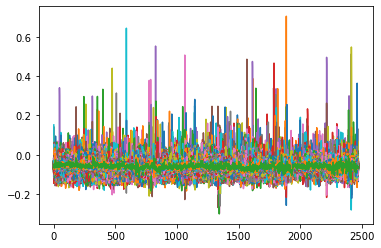

In [58]:
# A very simple and very narrow highpass filter
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])
kernel = kernel[:,None]
print(kernel.shape)
highpass_3x3 = ndimage.convolve(data,kernel )
%matplotlib inline
plt.plot(highpass_3x3[1])
plt.show()


In [60]:
with rasterio.open(r'E:\Brazil\Meridian Mining Espigao BM-AU\imageToDriveSentinel2MeridianDrillHighPass33.tif', 'w', **SENTINEL.meta) as dstcls:
    dstcls.write(highpass_3x3) #rearrange back to format rasterio expects - 


In [46]:
junk = ndimage.spline_filter(data)

In [62]:
junk = junk.astype('float32')
with rasterio.open(r'E:\Brazil\Meridian Mining Espigao BM-AU\imageToDriveSentinel2MeridianDrillspline.tif', 'w', **SENTINEL.meta) as dstcls:
    dstcls.write(junk) #rearrange back to format rasterio expects - 


In [20]:
#x = np.linspace(data.shape[0], data.shape[1], data.shape[2])
#data = data.astype('float32')
print(data[1].shape, data[0].shape)
dx = data[1] - data[0]
d_dx = FinDiff(0, dx)


(2471, 4363) (2471, 4363)


In [23]:
result_x = d_dx()

TypeError: No loop matching the specified signature and casting was found for ufunc solve1